In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
alterations = pd.read_csv("data/Alterations.txt", delim_whitespace  = True)
alterations.head()

,Description,127399_SOFT_TISSUE,22RV1_PROSTATE,A204_SOFT_TISSUE,A253_SALIVARY_GLAND,A427_LUNG,A431_SKIN,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A673_BONE,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,HS571T_OVARY,HTK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,MOTN1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OCILY10_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OUMS27_BONE,RT11284_URINARY_TRACT,SHSY5Y_AUTONOMIC_GANGLIA,U138MG_CENTRAL_NERVOUS_SYSTEM,UT7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,VMRCLCP_LUNG
0,PLCH2_mut,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UBE4B_mut,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ADGRB2_mut,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZSCAN20_mut,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SZT2_mut,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
response = pd.read_csv('data/Drug_response.txt', sep = '\t')
response.head()

,Description,22RV1_PROSTATE,2313287_STOMACH,42MGBA_CENTRAL_NERVOUS_SYSTEM,451LU_SKIN,5637_URINARY_TRACT,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,...,VMRCRCW_KIDNEY,VMRCRCZ_KIDNEY,WM115_SKIN,WM793_SKIN,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,WSUNHL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR7530_BREAST
0,(5Z)-7-Oxozeaenol,0.862564,0.759749,0.658579,0.104421,0.821017,0.710453,0.662955,0.578093,0.662305,...,NaN,0.652107,0.489042,0.480574,0.977626,0.564966,0.882111,0.439166,0.650792,0.899007
1,5-Fluorouracil,0.486544,0.606334,0.724452,0.958518,0.864270,0.954015,0.851043,0.504025,0.607007,...,0.966414,0.965504,0.864352,0.933608,0.976159,0.895568,0.926724,0.979950,0.917654,NaN
2,681640,0.957936,0.968253,0.947649,NaN,0.923259,0.988860,0.958651,0.875268,NaN,...,NaN,0.959264,0.979195,0.935878,0.983930,0.979477,0.965043,0.919013,0.890455,0.982976
3,A-443654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.388111,NaN,...,NaN,NaN,NaN,NaN,0.841546,0.989981,NaN,NaN,NaN,NaN
4,A-770041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795282,NaN,...,NaN,NaN,NaN,NaN,0.992595,0.986994,NaN,NaN,NaN,NaN


In [5]:
#Let's look at the alterations dataset

print("Are there any NaN values in the mutations dataset? ", alterations.isnull().values.any()) #no Nan values
print(f"Size of the dataset: {alterations.shape}: {alterations.shape[0]} mutations available in {alterations.shape[1]-1} cell populations.")

Are there any NaN values in the mutations dataset?  False
Size of the dataset: (64144, 1390): 64144 mutations available in 1389 cell populations.


In [6]:
#Let's look at the response dataset

print("Are there any NaN values in the response dataset? ", response.isnull().values.any()) #no Nan values
print(f"Size of the dataset: {response.shape}: the response to {response.shape[0]} drugs in {response.shape[1]} cell populations.")

Are there any NaN values in the response dataset?  True
Size of the dataset: (265, 744): the response to 265 drugs in 744 cell populations.


In [7]:
proportion_non_nans = (response.count()/response.count()["Description"]).sort_values() #looks at the proportions of NaNs for each cell population
proportion_non_nans

KPNRTBM1_AUTONOMIC_GANGLIA                     0.094340
NCIH1650_LUNG                                  0.101887
CORL32_LUNG                                    0.120755
ECC12_STOMACH                                  0.120755
MM1S_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE        0.222642
CORL311_LUNG                                   0.249057
NCIH2066_LUNG                                  0.260377
OCILY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.283019
JHOS4_OVARY                                    0.283019
U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.309434
SNU175_LARGE_INTESTINE                         0.309434
NCIH1105_LUNG                                  0.324528
MOLT16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.335849
KNS62_LUNG                                     0.335849
IGROV1_OVARY                                   0.335849
BT549_BREAST                                   0.339623
JEKO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       0.343396
MOLM16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0

In [8]:
weakest_response = min(response.drop('Description', axis = 1).min())
print(weakest_response) #No response is 0 ! 

0.00343348


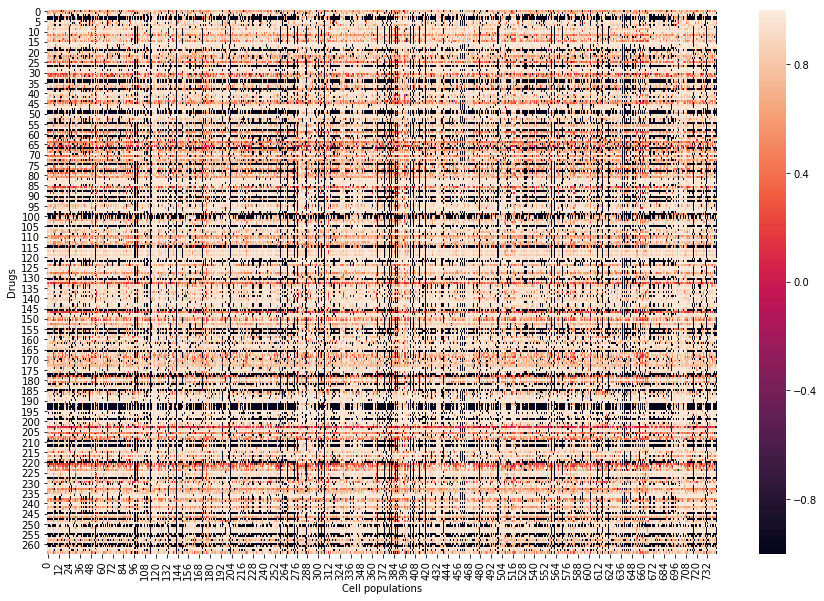

In [9]:
#What is the proportion of NaNs? Fill
 
filled_response = response.fillna(-1)
liste = range(0,len(filled_response.columns))
filled_response = filled_response.reset_index(drop = True).drop("Description", axis = 1).T.reset_index(drop=True).T#.rename(columns = map(lambda elem: elem, liste))# for i in len(filled_response))
fig = plt.figure( figsize = (15,10))
sns.heatmap(filled_response, cmap = sns.cm.rocket)
plt.xlabel('Cell populations')
plt.ylabel('Drugs');

### Transpose dataframes for homogeneity

In [27]:
alterations_t = alterations.set_index('Description').transpose()
response_t = response.set_index('Description').transpose()

print('Alterations:')
display(alterations_t.head())

print('Responses:')
response_t.head()

Alterations:


Description,PLCH2_mut,UBE4B_mut,ADGRB2_mut,ZSCAN20_mut,SZT2_mut,MOB3C_mut,ZFYVE9_mut,ST6GALNAC3_mut,TCHH_mut,HRNR_mut,...,HNRNPDL_del,DMTF1_del,PPP4R1_del,CDH1_del,SLC12A6_del,PTBP3_del,KCNE2_del,DGCR2_del,CASP8AP2_del,SCO2_del
127399_SOFT_TISSUE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22RV1_PROSTATE,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A204_SOFT_TISSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A253_SALIVARY_GLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A427_LUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Responses:


Description,(5Z)-7-Oxozeaenol,5-Fluorouracil,681640,A-443654,A-770041,Afatinib (1),Afatinib (2),AICA Ribonucleotide,AKT inhibitor VIII (1),AKT inhibitor VIII (2),...,XMD8-85,XMD8-92,Y-39983,YK-4-279,YM201636,Z-LLNle-CHO,ZG-10,Zibotentan,ZM447439,ZSTK474
22RV1_PROSTATE,0.862564,0.486544,0.957936,NaN,NaN,0.980851,0.953755,0.900127,0.875539,0.705603,...,NaN,0.967407,0.957671,0.874383,0.814287,NaN,0.842056,0.982288,0.963809,0.580011
2313287_STOMACH,0.759749,0.606334,0.968253,NaN,NaN,0.981590,0.974754,0.939173,0.704163,0.720505,...,NaN,NaN,0.908549,0.694709,0.808234,NaN,NaN,0.985190,0.972200,0.681297
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.658579,0.724452,0.947649,NaN,NaN,0.984402,0.974405,0.866506,0.938894,0.923254,...,NaN,NaN,0.947876,0.743543,0.934234,NaN,NaN,0.984182,0.865528,0.913602
451LU_SKIN,0.104421,0.958518,NaN,NaN,NaN,0.988836,0.958079,0.926063,0.964729,0.950208,...,NaN,0.864047,0.979420,0.731006,0.947785,NaN,0.818841,0.987237,NaN,0.929072
5637_URINARY_TRACT,0.821017,0.864270,0.923259,NaN,NaN,0.901464,0.875382,0.926505,0.989453,0.895321,...,NaN,NaN,0.932870,0.582418,0.909535,NaN,NaN,0.988991,0.801683,0.720424


#### Let's first try to see if the number of mutations has any impact on the response (naive)

In [28]:
alterations_t['Number of mutations'] = list(alterations_t.iloc[:,:].sum(axis = 1))

In [37]:
print(f'Number of cells in the alterations database: {len(alterations_t.index)}')
print(f'Number of cells in the response database: {len(response_t.index)}')
alterations_t.head()

Number of cells in the alterations database: 1389
Number of cells in the alterations database: 743


Description,PLCH2_mut,UBE4B_mut,ADGRB2_mut,ZSCAN20_mut,SZT2_mut,MOB3C_mut,ZFYVE9_mut,ST6GALNAC3_mut,TCHH_mut,HRNR_mut,...,DMTF1_del,PPP4R1_del,CDH1_del,SLC12A6_del,PTBP3_del,KCNE2_del,DGCR2_del,CASP8AP2_del,SCO2_del,Number of mutations
127399_SOFT_TISSUE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.0
22RV1_PROSTATE,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2254.0
A204_SOFT_TISSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.0
A253_SALIVARY_GLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,965.0
A427_LUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,494.0


##### Let's look at the elements in common (these are the only ones that can be used for training)

In [43]:
df1 = pd.concat([response_t, alterations_t['Number of mutations']], axis = 1, join = 'inner')
df1.head()

,(5Z)-7-Oxozeaenol,5-Fluorouracil,681640,A-443654,A-770041,Afatinib (1),Afatinib (2),AICA Ribonucleotide,AKT inhibitor VIII (1),AKT inhibitor VIII (2),...,XMD8-92,Y-39983,YK-4-279,YM201636,Z-LLNle-CHO,ZG-10,Zibotentan,ZM447439,ZSTK474,Number of mutations
22RV1_PROSTATE,0.862564,0.486544,0.957936,NaN,NaN,0.980851,0.953755,0.900127,0.875539,0.705603,...,0.967407,0.957671,0.874383,0.814287,NaN,0.842056,0.982288,0.963809,0.580011,2254.0
2313287_STOMACH,0.759749,0.606334,0.968253,NaN,NaN,0.981590,0.974754,0.939173,0.704163,0.720505,...,NaN,0.908549,0.694709,0.808234,NaN,NaN,0.985190,0.972200,0.681297,2120.0
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.658579,0.724452,0.947649,NaN,NaN,0.984402,0.974405,0.866506,0.938894,0.923254,...,NaN,0.947876,0.743543,0.934234,NaN,NaN,0.984182,0.865528,0.913602,261.0
5637_URINARY_TRACT,0.821017,0.864270,0.923259,NaN,NaN,0.901464,0.875382,0.926505,0.989453,0.895321,...,NaN,0.932870,0.582418,0.909535,NaN,NaN,0.988991,0.801683,0.720424,538.0
639V_URINARY_TRACT,0.710453,0.954015,0.988860,NaN,NaN,0.961860,0.964693,0.897153,0.954350,0.982961,...,0.919929,0.973877,0.727015,0.975033,NaN,0.806865,0.991601,0.972250,0.981602,1910.0


In [36]:
print(f'Number of cell populations in common: {len(df1.index)}')
proportion_non_nan_drugs = (df1.count()/len(df1.index)).sort_values() #looks at the proportions of NaNs for each cell population
#noNanDrugs = [drug for drug in df1.columns if df1[drug].isnull().values.any() == False]
proportion_non_nan_drugs #we have NaN's in all columns ! What shall we do with them?

Number of cell populations in common: 736


Rapamycin              0.322011
Erlotinib              0.323370
JW-7-52-1              0.345109
Tozasertib             0.347826
Cyclopamine            0.347826
Lapatinib              0.349185
Seliciclib             0.349185
XMD8-85                0.349185
WH-4-023               0.350543
Salubrinal             0.350543
Parthenolide           0.350543
Dasatinib              0.350543
GSK319347A             0.351902
MG-132                 0.351902
Pyrimethamine          0.351902
TGX221                 0.351902
Bortezomib             0.351902
Entinostat             0.351902
GNF-2                  0.351902
GSK269962A (1)         0.353261
BI-2536                0.353261
CGP-082996             0.353261
S-Trityl-L-cysteine    0.353261
CGP-60474              0.353261
Sunitinib              0.353261
CMK                    0.353261
A-443654               0.353261
WZ-1-84                0.353261
Z-LLNle-CHO            0.353261
Sorafenib              0.354620
                         ...   
Idelalis

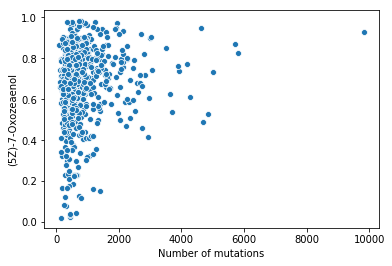

In [16]:
sns.scatterplot(df1['Number of mutations'], df1['(5Z)-7-Oxozeaenol']);

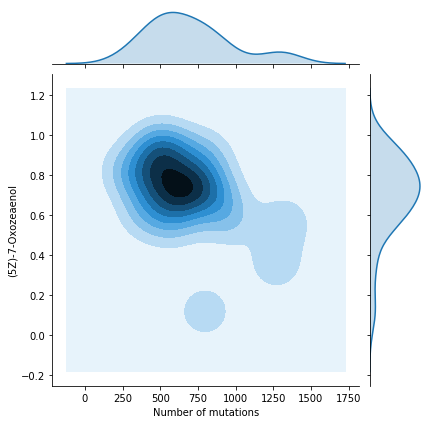

In [18]:
#Let's try to plot the density function of the first drug as a function of the number of mutations

sns.jointplot(x ='Number of mutations', y = str(df1.columns[0]), data = df1.dropna(), kind = 'kde'); #for now, just dropping all the NaNs.

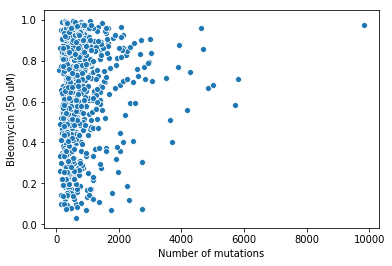

In [21]:
sns.scatterplot(df1['Number of mutations'], df1['Bleomycin (50 uM)']);

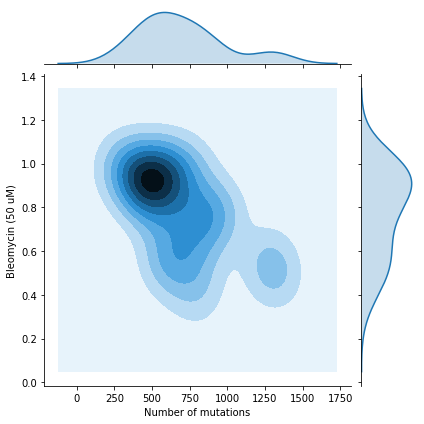

In [23]:
#Let's try to plot the density function of the first drug as a function of the number of mutations

sns.jointplot(x ='Number of mutations', y = 'Bleomycin (50 uM)', data = df1.dropna(), kind = 'kde'); #for now, just dropping all the NaNs.